In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size=100)

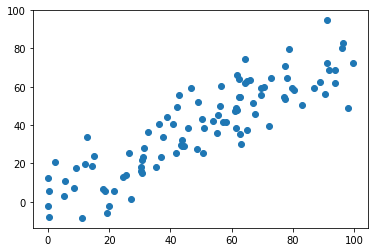

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
def demean(X):
    return X - np.mean(X,axis = 0)
X_demean = demean(X)

In [5]:
def f(w,X):
    return np.sum(X.dot(w)**2)/len(X)
def df(w,X):
    return X.T.dot(X.dot(w))*2./len(X)
def direction(w):
    return w / np.linalg.norm(w)
def first_component(X,initial_w,eta,n_iters = 1e4,epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter<n_iters:
        gradient = df(w,X)
        last_w = w
        w = w+eta*gradient
        w = direction(w) #注意1：每次求一个单位向量
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
            
        cur_iter += 1
    return w

In [44]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)
w

array([0.78115059, 0.62434266])

In [45]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w)*w

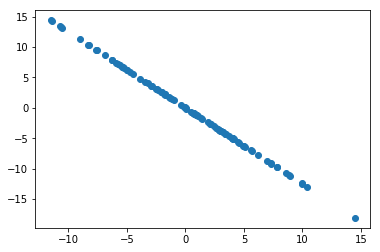

In [46]:
plt.scatter(X2[:,0],X2[:,1])

In [47]:
w2 = first_component(X2,initial_w,eta)
w2

array([-0.62433937,  0.78115322])

In [48]:
w.dot(w2)

4.221369461376856e-06

In [49]:
X2 = X - X.dot(w).reshape(-1,1)*w

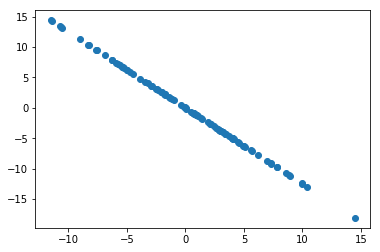

In [50]:
plt.scatter(X2[:,0],X2[:,1])

In [51]:
def first_n_compoents(n,X,eta=0.01,n_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w
    
    return res

In [52]:
first_n_compoents(2,X)

[array([0.76571372, 0.64318154]), array([-0.6431796 ,  0.76571536])]

In [53]:
w2.shape

(2,)

In [55]:
X2[0]

array([ 5.66103008, -7.08283643])

In [58]:
X.shape

(100, 2)

(2,)

(2,)